# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 15,5

---
# 2. import dataset

In [4]:
df = pd.read_csv('../0 data/master.csv')
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(66034, 6)

---
# 3. model

In [5]:
y = df['Y']
x = df.drop(['id','Y'], axis=1)
model =MLPClassifier(hidden_layer_sizes=(4,4,4), activation='logistic', solver='lbfgs', random_state=42)
model.fit(x, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [6]:
pred_values = model.predict_proba(x)
df['pred_values'] = pd.DataFrame(pred_values)[1]
df.shape

(66034, 7)

---
# 4. AUROC and Gini

In [7]:
pred_values = df['pred_values']
auroc = roc_auc_score(y, pred_values)
print('AUROC:',np.round(roc_auc_score(y, pred_values), 3))

AUROC: 0.803


In [8]:
gini = 2 * auroc - 1
print('Gini:',np.round(gini, 3))

Gini: 0.606


# 5. Accuracy and F1 Score

In [9]:
train_dict = {'actuals':y, 'predicted':pred_values}
test_calc = pd.DataFrame(train_dict)

max f:  0.3
max a:  0.55


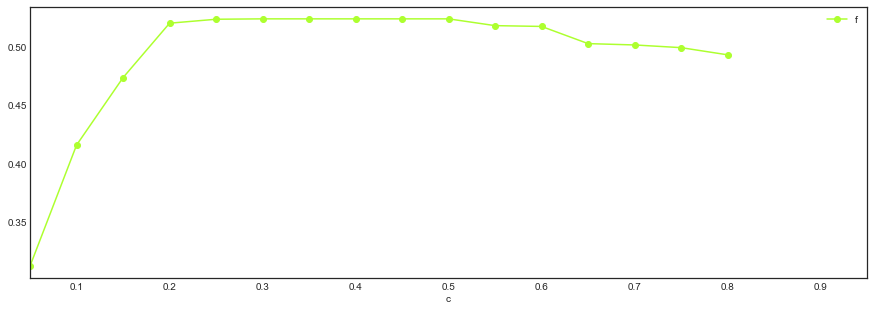

In [10]:
c = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
f = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
a = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

i = 0
for j in c:
    def flag(x):
        if x > j: return 1
        else: return 0
    test_calc['flag'] = test_calc['predicted'].apply(flag)
    df_table = confusion_matrix(test_calc['actuals'],test_calc['flag'])
    p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p * r) / (p + r)
    a[i] = (df_table[0,0] + df_table[1,1]) / df_table.sum()
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(f),pd.DataFrame(a)],axis=1)
df_decision.columns = ['c','f','a']
f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_f = float(f_max['c'])
max_a = float(a_max['c'])

df_decision.plot(x='c',y='f',marker="o", color='greenyellow')
print ("max f: ",max_f)
print ("max a: ",max_a)

In [11]:
def cut_off (x):
    if x > 0.55: return 1
    else: return 0
test_calc['flag'] = test_calc['predicted'].apply(cut_off)
print(confusion_matrix(test_calc['actuals'],test_calc['flag']))

[[59179   531]
 [ 3925  2399]]


In [12]:
c = confusion_matrix(test_calc['actuals'],test_calc['flag'])
print('Accuracy:',np.round((c[0][0] + c[1][1]) / c.sum(),3))

Accuracy: 0.933


In [13]:
p = c[1][1] / (c[1][1] + c[0][1])
r = c[1][1] / (c[1][1] + c[1][0])
print('F1 Score:',np.round((2 * p * r) / (p + r),3))

F1 Score: 0.518


---
# 6. export dataset

In [14]:
a = []
b = []
c = []
d = []

for i in [-3,-2,-1,0,1,2,3]:
    for j in [-1,1]:
        for k in [-1,1]:
            for l in [-1,1]:
                a.append(i)
                b.append(j)
                c.append(k)
                d.append(l)
                        
z = pd.DataFrame({'score_bin':a, 'acctype':b,'payment':c,'month':d})
pred_values = model.predict_proba(z)
z['pred_values'] = pd.DataFrame(pred_values)[1]

In [15]:
z.to_csv('../0 data/model.csv', index=False)
z.shape

(56, 5)